In [0]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

In [0]:
conn = psycopg2.connect(host ="salt.db.elephantsql.com",port ="5432",database="voaidweo",user="voaidweo",password="ZvgOQW6nR3kgSMkcBL6z8kR2qmTa0ApK")
cur = conn.cursor() 

# **MODELO FISICO**

In [0]:
cur.execute("drop table agendamento, avaliacoes, bairro, cidade, contato, endereco, modo_pagamento, servico, usuario cascade;")

In [0]:
cur.execute('''
CREATE TABLE Usuario (
    codigo int PRIMARY KEY,
    nome_usuario varchar(30),
    email varchar(50),
    sexo char,
    senha varchar(30),
    nome_completo varchar(60),
    data_nascimento date,
    cpf varchar(14),
    data_cadastro date
);

CREATE TABLE Servico (
    codigo int PRIMARY KEY,
    codigo_prestador int,
    nome varchar(60),
    descricao varchar(500),
    preco decimal(10,2),
    codigo_modo_pagamento int,
    data_publicacao date
);

CREATE TABLE Contato (
    codigo_usuario int,
    telefone varchar(14)
);

CREATE TABLE Endereco (
    codigo int PRIMARY KEY,
    cep varchar(9),
    endereco varchar(100),
    numero int,
    codigo_bairro int,
    codigo_cidade int
);

CREATE TABLE Agendamento (
    codigo int PRIMARY KEY,
    codigo_servico int,
    codigo_cliente int,
    codigo_endereco int,
    data date,
    hora varchar(5)
);

CREATE TABLE Modo_pagamento (
    codigo int PRIMARY KEY,
    modo varchar(50)
);

CREATE TABLE Avaliacoes (
    codigo_servico int,
    avaliacao int,
    comentario varchar(150)
);

CREATE TABLE Bairro (
    codigo int PRIMARY KEY,
    nome varchar(50)
);

CREATE TABLE Cidade (
    codigo int PRIMARY KEY,
    nome varchar(50)
);

CREATE TABLE usuario_endereco (
    codigo_usuario int,
    codigo_endereco int
);
 
ALTER TABLE Servico ADD CONSTRAINT FK_Servico_2
    FOREIGN KEY (codigo_prestador)
    REFERENCES Usuario (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE Servico ADD CONSTRAINT FK_Servico_3
    FOREIGN KEY (codigo_modo_pagamento)
    REFERENCES Modo_pagamento (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE Contato ADD CONSTRAINT FK_Contato_1
    FOREIGN KEY (codigo_usuario)
    REFERENCES Usuario (codigo)
    ON DELETE RESTRICT;
 
ALTER TABLE Endereco ADD CONSTRAINT FK_Endereco_2
    FOREIGN KEY (codigo_bairro)
    REFERENCES Bairro (codigo)
    ON DELETE RESTRICT;
 
ALTER TABLE Endereco ADD CONSTRAINT FK_Endereco_3
    FOREIGN KEY (codigo_cidade)
    REFERENCES Cidade (codigo)
    ON DELETE RESTRICT;
 
ALTER TABLE Agendamento ADD CONSTRAINT FK_Agendamento_2
    FOREIGN KEY (codigo_cliente)
    REFERENCES Usuario (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE Agendamento ADD CONSTRAINT FK_Agendamento_3
    FOREIGN KEY (codigo_endereco)
    REFERENCES Endereco (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE Agendamento ADD CONSTRAINT FK_Agendamento_4
    FOREIGN KEY (codigo_servico)
    REFERENCES Servico (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE Avaliacoes ADD CONSTRAINT FK_Avaliacoes_1
    FOREIGN KEY (codigo_servico)
    REFERENCES Servico (codigo)
    ON DELETE CASCADE;
 
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_usuario_endereco_1
    FOREIGN KEY (codigo_endereco)
    REFERENCES Endereco (codigo)
    ON DELETE RESTRICT;
 
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_usuario_endereco_2
    FOREIGN KEY (codigo_usuario)
    REFERENCES Usuario (codigo)
    ON DELETE SET NULL;''')

# **INSERT DOS DADOS**

In [0]:
#Insert de todos os dados nas tabelas criadas
cur.execute('''
insert into cidade values
(001,	'Aracruz'),
(002,	'Vila Velha'),
(003,	'Serra'),
(004,	'Linhares'),
(005,	'Vitoria'),
(006,	'Cariacica'),
(007,	'Cachoeiro de Itapemirim');

insert into bairro values
(001,	'De Carli'),
(002,	'Aracas'),
(003,	'Central Carapina'),
(004,	'Centro da Serra'),
(005,	'Colina'),
(006,	'das Laranjeiras'),
(007,	'Caratoira'),
(008,	'Campina Grande'),
(009,	'Santa Paula I'),
(010,	'Arariguaba'),
(011,	'Movelar'),
(012,	'Paul'),
(013,	'Joana Darc'),
(014,	'Alterosas'),
(015,	'Cidade da Barra'),
(016,	'Sao Torquato'),
(017,	' Rosario de Fatima'),
(018,	'Consolacao');

insert into endereco values
(001, '29194-025',	'Rua Joao da Costa Rampinelli',	150, 001, 001),
(002, '29103-021',	'Rua Atenas',	1960, 002, 002),
(003,	'29161-583',	'Rua Alfredo Chaves',	1074, 003, 003),
(004,	'29179-177',	'Rua Arrudao',	270,	004, 003),
(005,	'29900-399',  'Avenida Aracruz',	1125,	005, 004),
(006,	'29175-698',	'Rua Primavera',	689, 006, 003),
(007,	'29025-705',	'Escadaria Agripino Moreira Drumond',	676, 007, 005),
(008,	'29144-270',	'Rua Sebastiao Pedro de Oliveira',	615, 008, 006),
(009,	'29126-157',	'Rua Dalia',	506, 009, 002),
(010,	'29305-512',	'Rua Amancio Silva',	496,	010, 007),
(011,	'29906-100',	'Rua Pinheiro',	1941,	011, 004),
(012,	'29115-107',	'Rua Paulo Natali',	637,	012, 002),
(013,	'29048-100',	'Rua Miguel Arcanjo Moreira',	31,	013, 005),
(014,	'29167-029',	'Rua Brasilia',	54,	014, 003),
(015,	'29124-016',	'Rua Castro Alves',	41,	015, 002),
(016,	'29114-240',	'Rua Professora Olga Feres de Cuzzi',	941,	016, 002),
(017,	'29161-583',	'Rua Alfredo Chaves',	854, 003, 003),
(018,	'29179-177',	'Rua Arrudao',	2,	004, 003),
(019,	'29161-192',	'Rua dos Curios',	451,	017, 003),
(020,	'29175-698',	'Rua Primavera',	364,	006, 003),
(021,	'29045-605',	'Escadaria Abrao Sader',	75,	018, 005),
(022,	'29048-100',	'Rua Miguel Arcanjo Moreira',	87,	013, 005);

insert into modo_pagamento values
(001,	'Dinheiro e cartao'),
(002,	'Dinheiro');

insert into usuario values
(001,'mosouza','MiguelOliveiraSouza@gmail.com','M','mortadela5','Miguel Oliveira Souza', '1967/09/28','470.750.937-11','2019/07/22'),
(002,'mlribeiro','MarianaLimaRibeiro@gmail.com','F','Eibai6chee','Mariana Lima Ribeiro','2000/05/30','157.779.187-86','2019/02/23'),
(003,'krpinto','KauanRochaPinto@hotmail.com','M','kovuR6sh','Kauan Rocha Pinto','1990/03/18','496.245.022-00','2019/09/23'),
(004,'alsilva','AlineLimaSilva@hotmail.com','F','ru4cohseCh','Aline Lima Silva','1998/05/17','621.541.500-63','2018/02/15'),
(005,'lasousa','LeonorAzevedoSousa@gmail.com','F','ug2QuoLahje','Leonor Azevedo Sousa','1983/12/03','495.836.132-40','2019/01/12'),
(006,'fmbarros','FabioMeloBarros@hotmail.com','M','Wug3iria6','Fabio Melo Barros','1959/03/16','362.698.964-01','2019/06/13'),
(007,'lcrodrigues','LuisCarvalhoRodrigues@hotmail.com','M','ach9Ooch','Luis Carvalho Rodrigues','1979/07/13','779.033.598-78','2019/07/31'),
(008,'cralves','ClaraRochaAlves@yahoo.com.br','F','Chiexe7otu3','Clara Rocha Alves','1984/11/25','487.398.093-31','2019/07/22'),
(009,'jgalmeida','JoaoGomesAlmeida@gmail.com','M','oG9Ii1sho','Joao Gomes Almeida','1982/03/31','805.302.543-95','2019/04/29'),
(010,'mocorreia','MartimOliveiraCorreia@hotmail.com','M','ob2IXee5oo','Martim Oliveira Correia','1988/09/10','189.096.601-04','2019/09/15'),
(011,'ybcarvalho','YasminBarrosCarvalho@gmail.com','F','Ieph3afegh','Yasmin Barros Carvalho','1965/06/03','620.590.802-66','2019/06/16'),
(012,'lcpereira','LuisCarvalhoPereira@hotmail.com','M','Meothu8lei','Luis Carvalho Pereira','2000/02/18','688.757.541-87','2019/08/20'),
(013,'rcrodrigues','RyanCarvalhoRodrigues@gmail.com','M','vaicorinthians','Ryan Carvalho Rodrigues','1998/08/21','389.195.961-31','2019/07/10'),
(014,'mssilva','MarisaSantosSilva@gmail.com','F','Pho4toongoh','Marisa Santos Silva','1998/01/22','515.134.458-71','2019/02/23'),
(015,'ipcosta','IsabellePereiraCosta@hotmail.com','F','princesadisney','Isabelle Pereira Costa','1978/04/01',	'860.051.981-06','2019/09/01'),
(016,'eccarvalho','EduardaCorreiaCarvalho@hotmail.com','F','jesusetop123','Eduarda Correia Carvalho','1971/06/30','459.188.175-06','2018/02/15'),
(017,'jpcarvalho','JosePereiraCarvalho@gmail.com','M','amominhavida','Jose Pereira Carvalho','1987/03/12','663.280.264-80','2019/01/12'),
(018,'dccastro','DiegoCardosoCastro@gmail.com','M','cardosod','Diego Cardoso Castro','1982/01/05','970.605.561-41','2019/06/13'),
(019,'vitaraujo','VitoriaAraujoPereira@hotmail.com','F','varaujo','Vitoria Araujo Pereira','1963/11/23','823.971.241-06','2019/07/31'),
(020,'jcrocha','JulietaCavalcantiRocha@yahoo.com.br','F','amomeupai','Julieta Cavalcanti Rocha','1991/05/29','770.366.643-20','2019/07/22');

insert into servico values
(001, 003, 'Manutencao de ar-condicionado', 'Instalacao - Manutencao - Higienizacao ar condicionado',	0,	001,	'2019/09/23'),
(002,	017, 'Frete',	'Faco transporte, mudancas, fretes, etc para todo o estado', 	150.00,	002,	'2018/02/15'),
(003,	006, 'Jardinagem',	'Corte de arvores e podas em geral',	0,	001,	'2019/06/13'),
(004,	008, 'Baba',	'Cuido de criancas com responsabilidade. Valor acessivel.',	60.00,	002,	'2019/07/22'),
(005,	009, 'Faxineiro',	'Faco faxinas',	90.00,	002,	'2019/04/29'),
(006,	011, 'Eletricista',	'Instalacao, alteracao, manutencao e reparo em todos os tipos de construcoes',	0,	002,	'2019/06/16'),
(007,	012, 'Pedreiro',	'Orcamento gratuito e servico de qualidade',	0,	002,	'2019/08/14'),
(008,	010, 'Motorista particular',	'Viagens, passeios e corridas rapidas!!',	0,	001,	'2018/02/14'),
(009,	005, 'Borracheiro',	'Atendimento 24 horas',	80.00,	001,	'2019/06/13'),
(010,	020, 'Baba',	'Cuido de criancas ate 6 anos.',	50.00,	002,	'2019/07/10');

insert into contato values
(001,	'(27) 4075-9797'),
(002,	'(28) 4459-2069'),
(003,	'(28) 8799-5493'),
(004,	'(27) 8570-9305'),
(005,	'(27) 5747-8945'),
(006,	'(27) 2525-7502'),
(007,	'(28) 8798-2391'),
(008,	'(27) 7163-5324'),
(009,	'(28) 3389-9972'),
(010,	'(27) 3706-4024'),
(011,	'(27) 7154-2546'),
(012,	'(27) 5079-8415'),
(013,	'(27) 9958-9797'),
(014,	'(28) 9862-2069'),
(015,	'(28) 9745-5493'),
(016,	'(27) 9945-9305'),
(017,	'(27) 9041-8945'),
(018,	'(27) 9700-7502'),
(019,	'(28) 9999-9123'),
(020,	'(27) 9688-2453');

insert into avaliacoes values
(001,	4,	'Muito bom'),
(002,	5,	'Perfeito, resolveu todo o meu problema. Servico mt rapido e atencioso'),
(003,	5,	'Ficou tudo perfeito, amei'),
(004,	5,	'Meu filho adorou'),
(005,	0,	'Atrasou e nao limpou o banheiro'),
(001,	3,	'Resolveu o problema'),
(009,	5,	'Atendimento rapido'),
(007,	4,	'Muito organizado e deixa tudo limpo'),
(010,	5,	'Muito simpatica'),
(008,	4,	'Carro limpo e com balinha');

insert into agendamento values
(001,	001,	001,  001, '2019/09/25',	'9h00'),
(002,	003,	002,  002, '2019/09/26',	'14h30'),
(003,	004,	010,  010, '2019/09/27',  '20h00'),
(004,	006,	012,	012, '2019/09/24',	'12h00'),
(005,	004,	008,	008, '2019/09/09',	'7h00'),
(006,	005,	012,	012, '2019/09/17',	'14h30'),
(007,	001,	010,	010, '2019/10/01',	'17h00'),
(008,	009,	002,	002, '2019/10/10',	'12h00'),
(009,	007,	019,	019, '2019/09/20',	'14h00'),
(010,	010,	006,	006, '2019/10/12',	'11h00'),
(011,	008,	015,	015, '2019/10/10',	'10h00'),
(012,	003,	013,	013, '2019/10/08',	'8h30'),
(013,	009,	001,	001, '2019/10/24',	'9h30'),
(014,	007,	019,	019, '2019/11/07',	'9h00'),
(015,	010,	006,	006, '2019/11/03',	'14h00'),
(016,	007,	002,	002, '2019/10/28',	'8h30'),
(017,	008,  004,	004, '2019/11/07',	'20h00'),
(018,	003,	009,	009, '2019/10/02',	'20h00'),
(019,	009,	015,	015, '2019/11/07',	'9h00'),
(020,	002,	016,	016, '2019/11/05',	'15h00');

insert into usuario_endereco values
(001,	001),
(002,	002),
(003,	003),
(004,	004),
(005,	005),
(006,	006),
(007,	007),
(008,	008),
(009,	009),
(010,	010),
(011,	011),
(012, 012),
(001,	013),
(013,	014),
(014,	015),
(002,	016),
(015,	017),
(016, 018),
(017,	019),
(018,	020),
(019,	021),
(020,	022);''')

# **Seleção de todos os dados da tabela:**

**Seleção de todos os campos da tabela Usuário:**

In [0]:
usuario = pd.read_sql_query("""SELECT * FROM usuario;""",conn)
usuario

,codigo,nome_usuario,email,sexo,senha,nome_completo,data_nascimento,cpf,data_cadastro
0,1,mosouza,MiguelOliveiraSouza@gmail.com,M,mortadela5,Miguel Oliveira Souza,1967-09-28,470.750.937-11,2019-07-22
1,2,mlribeiro,MarianaLimaRibeiro@gmail.com,F,Eibai6chee,Mariana Lima Ribeiro,2000-05-30,157.779.187-86,2019-02-23
2,3,krpinto,KauanRochaPinto@hotmail.com,M,kovuR6sh,Kauan Rocha Pinto,1990-03-18,496.245.022-00,2019-09-23
3,4,alsilva,AlineLimaSilva@hotmail.com,F,ru4cohseCh,Aline Lima Silva,1998-05-17,621.541.500-63,2018-02-15
4,5,lasousa,LeonorAzevedoSousa@gmail.com,F,ug2QuoLahje,Leonor Azevedo Sousa,1983-12-03,495.836.132-40,2019-01-12
5,6,fmbarros,FabioMeloBarros@hotmail.com,M,Wug3iria6,Fabio Melo Barros,1959-03-16,362.698.964-01,2019-06-13
6,7,lcrodrigues,LuisCarvalhoRodrigues@hotmail.com,M,ach9Ooch,Luis Carvalho Rodrigues,1979-07-13,779.033.598-78,2019-07-31
7,8,cralves,ClaraRochaAlves@yahoo.com.br,F,Chiexe7otu3,Clara Rocha Alves,1984-11-25,487.398.093-31,2019-07-22
8,9,jgalmeida,JoaoGomesAlmeida@gmail.com,M,oG9Ii1sho,Joao Gomes Almeida,1982-03-31,805.302.543-95,2019-04-29
9,10,mocorreia,MartimOliveiraCorreia@hotmail.com,M,ob2IXee5oo,Martim Oliveira Correia,1988-09-10,189.096.601-04,2019-09-15


**Seleção de todos os campos da tabela Serviço:**

In [0]:
servico = pd.read_sql_query("""SELECT * FROM servico;""",conn)
servico

,codigo,codigo_prestador,nome,descricao,preco,codigo_modo_pagamento,data_publicacao
0,1,3,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,0.0,1,2019-09-23
1,2,17,Frete,"Faco transporte, mudancas, fretes, etc para to...",150.0,2,2018-02-15
2,3,6,Jardinagem,Corte de arvores e podas em geral,0.0,1,2019-06-13
3,4,8,Baba,Cuido de criancas com responsabilidade. Valor ...,60.0,2,2019-07-22
4,5,9,Faxineiro,Faco faxinas,90.0,2,2019-04-29
5,6,11,Eletricista,"Instalacao, alteracao, manutencao e reparo em ...",0.0,2,2019-06-16
6,7,12,Pedreiro,Orcamento gratuito e servico de qualidade,0.0,2,2019-08-14
7,8,10,Motorista particular,"Viagens, passeios e corridas rapidas!!",0.0,1,2018-02-14
8,9,5,Borracheiro,Atendimento 24 horas,80.0,1,2019-06-13
9,10,20,Baba,Cuido de criancas ate 6 anos.,50.0,2,2019-07-10


**Seleção de todos os campos da tabela Contato:**



In [0]:
contato = pd.read_sql_query("""SELECT * FROM contato;""",conn)
contato

,codigo_usuario,telefone
0,1,(27) 4075-9797
1,2,(28) 4459-2069
2,3,(28) 8799-5493
3,4,(27) 8570-9305
4,5,(27) 5747-8945
5,6,(27) 2525-7502
6,7,(28) 8798-2391
7,8,(27) 7163-5324
8,9,(28) 3389-9972
9,10,(27) 3706-4024


**Seleção de todos os campos da tabela Endereço:**

In [0]:
endereco = pd.read_sql_query("""SELECT * FROM endereco;""",conn)
endereco

,codigo,cep,endereco,numero,codigo_bairro,codigo_cidade
0,1,29194-025,Rua Joao da Costa Rampinelli,150,1,1
1,2,29103-021,Rua Atenas,1960,2,2
2,3,29161-583,Rua Alfredo Chaves,1074,3,3
3,4,29179-177,Rua Arrudao,270,4,3
4,5,29900-399,Avenida Aracruz,1125,5,4
5,6,29175-698,Rua Primavera,689,6,3
6,7,29025-705,Escadaria Agripino Moreira Drumond,676,7,5
7,8,29144-270,Rua Sebastiao Pedro de Oliveira,615,8,6
8,9,29126-157,Rua Dalia,506,9,2
9,10,29305-512,Rua Amancio Silva,496,10,7


**Seleção de todos os campos da tabela Modo_Pagamento:**

In [0]:
modo_pagamento = pd.read_sql_query("""SELECT * FROM modo_pagamento;""",conn)
modo_pagamento

,codigo,modo
0,1,Dinheiro e cartao
1,2,Dinheiro


**Seleção de todos os campos da tabela Avaliações:**

In [0]:
avaliacoes = pd.read_sql_query("""SELECT * FROM avaliacoes;""",conn)
avaliacoes

,codigo_servico,avaliacao,comentario
0,1,4,Muito bom
1,2,5,"Perfeito, resolveu todo o meu problema. Servic..."
2,3,5,"Ficou tudo perfeito, amei"
3,4,5,Meu filho adorou
4,5,0,Atrasou e nao limpou o banheiro
5,1,3,Resolveu o problema
6,9,5,Atendimento rapido
7,7,4,Muito organizado e deixa tudo limpo
8,10,5,Muito simpatica
9,8,4,Carro limpo e com balinha


**Seleção de todos os campos da tabela Agendamento:**

In [0]:
agendamento = pd.read_sql_query("""SELECT * FROM agendamento;""",conn)
agendamento

,codigo,codigo_servico,codigo_cliente,codigo_endereco,data,hora
0,1,1,1,1,2019-09-25,9h00
1,2,3,2,2,2019-09-26,14h30
2,3,4,10,10,2019-09-27,20h00
3,4,6,12,12,2019-09-24,12h00
4,5,4,8,8,2019-09-09,7h00
5,6,5,12,12,2019-09-17,14h30
6,7,1,10,10,2019-10-01,17h00
7,8,9,2,2,2019-10-10,12h00
8,9,7,19,19,2019-09-20,14h00
9,10,10,6,6,2019-10-12,11h00


**Seleção de todos os campos da tabela Bairro:**

In [0]:
bairro = pd.read_sql_query("""SELECT * FROM bairro;""",conn)
bairro

,codigo,nome
0,1,De Carli
1,2,Aracas
2,3,Central Carapina
3,4,Centro da Serra
4,5,Colina
5,6,das Laranjeiras
6,7,Caratoira
7,8,Campina Grande
8,9,Santa Paula I
9,10,Arariguaba


**Seleção de todos os campos da tabela Cidade:**

In [0]:
cidade = pd.read_sql_query("""SELECT * FROM cidade;""",conn)
cidade

,codigo,nome
0,1,Aracruz
1,2,Vila Velha
2,3,Serra
3,4,Linhares
4,5,Vitoria
5,6,Cariacica
6,7,Cachoeiro de Itapemirim


# **Consulta nas tabelas com Filtro Where:**

**Seleciona e exibe todos os nomes na tabela Usuário do sexo feminino:**

In [0]:
where1 = pd.read_sql_query("""SELECT nome_completo FROM usuario WHERE sexo = 'F';""",conn)
where1

,nome_completo
0,Mariana Lima Ribeiro
1,Aline Lima Silva
2,Leonor Azevedo Sousa
3,Clara Rocha Alves
4,Yasmin Barros Carvalho
5,Marisa Santos Silva
6,Isabelle Pereira Costa
7,Eduarda Correia Carvalho
8,Vitoria Araujo Pereira
9,Julieta Cavalcanti Rocha


**Seleciona e exibe todos os nomes, descrições da tabela Serviço onde o preço dos serviços são menores que 100:**

In [0]:
where2 = pd.read_sql_query("""SELECT nome, descricao FROM servico WHERE preco < 100;""",conn)
where2

,nome,descricao
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...
1,Jardinagem,Corte de arvores e podas em geral
2,Baba,Cuido de criancas com responsabilidade. Valor ...
3,Faxineiro,Faco faxinas
4,Eletricista,"Instalacao, alteracao, manutencao e reparo em ..."
5,Pedreiro,Orcamento gratuito e servico de qualidade
6,Motorista particular,"Viagens, passeios e corridas rapidas!!"
7,Borracheiro,Atendimento 24 horas
8,Baba,Cuido de criancas ate 6 anos.


**Seleciona e exibe o nome e a descrição do servico que o preço não tem valor igual a zero:**

In [0]:
where3 = pd.read_sql_query("""SELECT nome, descricao FROM servico WHERE preco <> 0;""",conn)
where3

,nome,descricao
0,Frete,"Faco transporte, mudancas, fretes, etc para to..."
1,Baba,Cuido de criancas com responsabilidade. Valor ...
2,Faxineiro,Faco faxinas
3,Borracheiro,Atendimento 24 horas
4,Baba,Cuido de criancas ate 6 anos.


**Seleciona e exibe todos as avaliações e comentários recebidos da tabela Avaliacoes onde a avaliação recebida é maior ou igual a 3:**

In [0]:
where4 = pd.read_sql_query("""SELECT avaliacao, comentario FROM avaliacoes WHERE avaliacao >= 3;""",conn)
where4

,avaliacao,comentario
0,4,Muito bom
1,5,"Perfeito, resolveu todo o meu problema. Servic..."
2,5,"Ficou tudo perfeito, amei"
3,5,Meu filho adorou
4,3,Resolveu o problema
5,5,Atendimento rapido
6,4,Muito organizado e deixa tudo limpo
7,5,Muito simpatica
8,4,Carro limpo e com balinha


# **Consulta nas tabelas com Operadores Lógicos:**

**Seleciona e exibe todos os nomes e descrição de serviços na tabela Servico onde o preco dos mesmos não é um valor nulo:**

In [0]:
logico1 = pd.read_sql_query("""SELECT nome, descricao FROM servico WHERE preco < 100 AND preco > 50 ;""",conn)
logico1

,nome,descricao
0,Baba,Cuido de criancas com responsabilidade. Valor ...
1,Faxineiro,Faco faxinas
2,Borracheiro,Atendimento 24 horas


**Seleciona e exibe todos os nomes da tabela Usuário onde a data de nascimento de cada usuário está entre 01/01/1990 e 31/12/1999:**

In [0]:
logico2 = pd.read_sql_query("""SELECT nome_completo FROM usuario WHERE data_nascimento >= '1990/01/01' AND data_nascimento <= '1999/12/31';""",conn)
logico2

,nome_completo
0,Kauan Rocha Pinto
1,Aline Lima Silva
2,Ryan Carvalho Rodrigues
3,Marisa Santos Silva
4,Julieta Cavalcanti Rocha


**Seleciona e exibe todos os nomes e descrição de serviços na tabela Servico onde o preco dos mesmos é menor que 100 e a data de publicação deles é igual a 01/01/2019:**

In [0]:
logico3 = pd.read_sql_query("""SELECT nome, descricao FROM servico WHERE preco < 100 AND data_publicacao >= '2019/01/01';""",conn)
logico3

,nome,descricao
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...
1,Jardinagem,Corte de arvores e podas em geral
2,Baba,Cuido de criancas com responsabilidade. Valor ...
3,Faxineiro,Faco faxinas
4,Eletricista,"Instalacao, alteracao, manutencao e reparo em ..."
5,Pedreiro,Orcamento gratuito e servico de qualidade
6,Borracheiro,Atendimento 24 horas
7,Baba,Cuido de criancas ate 6 anos.


**Seleciona e exibe todos os bairros e endereços da tabela Endereco onde a cidade das mesmas é Vila Velha ou Serra:**

In [0]:
logico4 = pd.read_sql_query("""SELECT endereco FROM endereco WHERE codigo_cidade = 3 OR codigo_cidade = 2;""",conn)
logico4

,endereco
0,Rua Atenas
1,Rua Alfredo Chaves
2,Rua Arrudao
3,Rua Primavera
4,Rua Dalia
5,Rua Paulo Natali
6,Rua Brasilia
7,Rua Castro Alves
8,Rua Professora Olga Feres de Cuzzi
9,Rua Alfredo Chaves


**Seleciona e exibe todos os bairros e endereços da tabela Endereço onde o codigo dos usuarios não é nulo:**

In [0]:
logico5 = pd.read_sql_query("""SELECT comentario FROM avaliacoes WHERE comentario IS NOT NULL;""",conn)
logico5

,comentario
0,Muito bom
1,"Perfeito, resolveu todo o meu problema. Servic..."
2,"Ficou tudo perfeito, amei"
3,Meu filho adorou
4,Atrasou e nao limpou o banheiro
5,Resolveu o problema
6,Atendimento rapido
7,Muito organizado e deixa tudo limpo
8,Muito simpatica
9,Carro limpo e com balinha


# **Consultas nas tabelas com Operadores Aritméticos:**

**Seleciona e exibe o nome, a descrição e o valor de 10% de desconto dos serviços:**

In [0]:
aritmetico1 = pd.read_sql_query("""SELECT nome, descricao, preco*0.1 AS Desconto FROM servico;""",conn)
aritmetico1

,nome,descricao,desconto
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,0.0
1,Frete,"Faco transporte, mudancas, fretes, etc para to...",15.0
2,Jardinagem,Corte de arvores e podas em geral,0.0
3,Baba,Cuido de criancas com responsabilidade. Valor ...,6.0
4,Faxineiro,Faco faxinas,9.0
5,Eletricista,"Instalacao, alteracao, manutencao e reparo em ...",0.0
6,Pedreiro,Orcamento gratuito e servico de qualidade,0.0
7,Motorista particular,"Viagens, passeios e corridas rapidas!!",0.0
8,Borracheiro,Atendimento 24 horas,8.0
9,Baba,Cuido de criancas ate 6 anos.,5.0


**Seleciona e exibe o nome, a descrição e o valor total com 10% de desconto dos serviços:**

In [0]:
aritmetico2 = pd.read_sql_query("""SELECT nome, descricao, preco*0.9 AS "Preço com desconto" FROM servico WHERE preco*0.9 < 90;""",conn)
aritmetico2

,nome,descricao,Preço com desconto
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,0.0
1,Jardinagem,Corte de arvores e podas em geral,0.0
2,Baba,Cuido de criancas com responsabilidade. Valor ...,54.0
3,Faxineiro,Faco faxinas,81.0
4,Eletricista,"Instalacao, alteracao, manutencao e reparo em ...",0.0
5,Pedreiro,Orcamento gratuito e servico de qualidade,0.0
6,Motorista particular,"Viagens, passeios e corridas rapidas!!",0.0
7,Borracheiro,Atendimento 24 horas,72.0
8,Baba,Cuido de criancas ate 6 anos.,45.0


**Seleciona e exibe o nome, a descrição e o preço com inflação de 5%:**

In [0]:
aritmetico3 = pd.read_sql_query("""SELECT nome, descricao, preco*1.05 AS "Preço com inflação de 5%" FROM servico;""",conn)
aritmetico3

,nome,descricao,Preço com inflação de 5%
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,0.0
1,Frete,"Faco transporte, mudancas, fretes, etc para to...",157.5
2,Jardinagem,Corte de arvores e podas em geral,0.0
3,Baba,Cuido de criancas com responsabilidade. Valor ...,63.0
4,Faxineiro,Faco faxinas,94.5
5,Eletricista,"Instalacao, alteracao, manutencao e reparo em ...",0.0
6,Pedreiro,Orcamento gratuito e servico de qualidade,0.0
7,Motorista particular,"Viagens, passeios e corridas rapidas!!",0.0
8,Borracheiro,Atendimento 24 horas,84.0
9,Baba,Cuido de criancas ate 6 anos.,52.5


# **Consultas nas tabelas com os Campos Renomeados:**

**Seleciona e exibe o nome e o login dos usuários:**

In [0]:
campo1 = pd.read_sql_query("""SELECT nome_completo AS Nome, nome_usuario AS Login FROM usuario;""",conn)
campo1

,nome,login
0,Miguel Oliveira Souza,mosouza
1,Mariana Lima Ribeiro,mlribeiro
2,Kauan Rocha Pinto,krpinto
3,Aline Lima Silva,alsilva
4,Leonor Azevedo Sousa,lasousa
5,Fabio Melo Barros,fmbarros
6,Luis Carvalho Rodrigues,lcrodrigues
7,Clara Rocha Alves,cralves
8,Joao Gomes Almeida,jgalmeida
9,Martim Oliveira Correia,mocorreia


**Seleciona e exibe a quantidade de usuários:**

In [0]:
campo2 = pd.read_sql_query("""SELECT COUNT(*) AS Qtd_usuarios FROM usuario;""",conn)
campo2

,qtd_usuarios
0,20


**Seleciona e exibe o nome e a idade dos usuários:**

In [0]:
campo3 = pd.read_sql_query("""SELECT nome_completo AS Nome, AGE(CURRENT_DATE,data_nascimento) AS Idade FROM usuario;""",conn)
campo3

,nome,idade
0,Miguel Oliveira Souza,19032 days
1,Mariana Lima Ribeiro,7106 days
2,Kauan Rocha Pinto,10827 days
3,Aline Lima Silva,7848 days
4,Leonor Azevedo Sousa,13122 days
5,Fabio Melo Barros,22144 days
6,Luis Carvalho Rodrigues,14727 days
7,Clara Rocha Alves,12765 days
8,Joao Gomes Almeida,13735 days
9,Martim Oliveira Correia,11385 days


# **Consultas nas tabelas com Operadores Like e Datas:**

**Seleciona e exibe o nome completo dos usuários que iniciam com M:**

In [0]:
likeData1 = pd.read_sql_query("""SELECT nome_completo FROM usuario WHERE nome_completo ILIKE 'm%';""",conn)
likeData1

,nome_completo
0,Miguel Oliveira Souza
1,Mariana Lima Ribeiro
2,Martim Oliveira Correia
3,Marisa Santos Silva


**Seleciona e exibe o nome completo dos usuários que terminam com A:**

In [0]:
likeData2 = pd.read_sql_query("""SELECT nome_completo FROM usuario WHERE nome_completo LIKE '%a';""",conn)
likeData2

,nome_completo
0,Miguel Oliveira Souza
1,Aline Lima Silva
2,Leonor Azevedo Sousa
3,Joao Gomes Almeida
4,Martim Oliveira Correia
5,Luis Carvalho Pereira
6,Marisa Santos Silva
7,Isabelle Pereira Costa
8,Vitoria Araujo Pereira
9,Julieta Cavalcanti Rocha


**Seleciona e exibe o nome completo e o email dos usuários que possuem contas no yahoo:**

In [0]:
likeData3 = pd.read_sql_query("""SELECT nome_completo, email FROM usuario WHERE email LIKE '%yahoo%';""",conn)
likeData3

,nome_completo,email
0,Clara Rocha Alves,ClaraRochaAlves@yahoo.com.br
1,Julieta Cavalcanti Rocha,JulietaCavalcantiRocha@yahoo.com.br


**Seleciona e exibe o telefone dos usuários com DDD 27:**

In [0]:
likeData4 = pd.read_sql_query("""SELECT telefone FROM contato WHERE telefone LIKE '(27)%';""",conn)
likeData4

,telefone
0,(27) 4075-9797
1,(27) 8570-9305
2,(27) 5747-8945
3,(27) 2525-7502
4,(27) 7163-5324
5,(27) 3706-4024
6,(27) 7154-2546
7,(27) 5079-8415
8,(27) 9958-9797
9,(27) 9945-9305


**Seleciona e exibe o login dos usuários que possuem 7 caracteres:**

In [0]:
likeData5 = pd.read_sql_query("""SELECT nome_usuario FROM usuario WHERE nome_usuario LIKE '_______';""",conn)
likeData5

,nome_usuario
0,mosouza
1,krpinto
2,alsilva
3,lasousa
4,cralves
5,mssilva
6,ipcosta
7,jcrocha


**Seleciona e exibe o telefone dos usuários que possuem DD 28:**

In [0]:
likeData6 = pd.read_sql_query("""SELECT telefone FROM contato WHERE telefone LIKE '(28)%';""",conn)
likeData6

,telefone
0,(28) 4459-2069
1,(28) 8799-5493
2,(28) 8798-2391
3,(28) 3389-9972
4,(28) 9862-2069
5,(28) 9745-5493
6,(28) 9999-9123


**Seleciona e exibe o nome completo e o email dos usuários que possuem conta hotmail:**

In [0]:
likeData7 = pd.read_sql_query("""SELECT nome_completo, email FROM usuario WHERE email LIKE '%hotmail%';""",conn)
likeData7

,nome_completo,email
0,Kauan Rocha Pinto,KauanRochaPinto@hotmail.com
1,Aline Lima Silva,AlineLimaSilva@hotmail.com
2,Fabio Melo Barros,FabioMeloBarros@hotmail.com
3,Luis Carvalho Rodrigues,LuisCarvalhoRodrigues@hotmail.com
4,Martim Oliveira Correia,MartimOliveiraCorreia@hotmail.com
5,Luis Carvalho Pereira,LuisCarvalhoPereira@hotmail.com
6,Isabelle Pereira Costa,IsabellePereiraCosta@hotmail.com
7,Eduarda Correia Carvalho,EduardaCorreiaCarvalho@hotmail.com
8,Vitoria Araujo Pereira,VitoriaAraujoPereira@hotmail.com


**Seleciona o nome dos usuário e mostra a quanto tempo ele estão cadastrados no sistema:**

In [0]:
likeData8 = pd.read_sql_query("""SELECT nome_completo, CURRENT_DATE-(data_cadastro) AS "Dias no sistema" FROM usuario;""",conn)
likeData8

,nome_completo,Dias no sistema
0,Miguel Oliveira Souza,121
1,Mariana Lima Ribeiro,270
2,Kauan Rocha Pinto,58
3,Aline Lima Silva,643
4,Leonor Azevedo Sousa,312
5,Fabio Melo Barros,160
6,Luis Carvalho Rodrigues,112
7,Clara Rocha Alves,121
8,Joao Gomes Almeida,205
9,Martim Oliveira Correia,66


**Seleciona e exibe o nome e a descrição dos serviços que estão com menos de 180 dias cadastrados no sistema:**

In [0]:
likeData9 = pd.read_sql_query("""SELECT nome, descricao FROM servico WHERE CURRENT_DATE-data_publicacao < 180;""",conn)
likeData9

,nome,descricao
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...
1,Jardinagem,Corte de arvores e podas em geral
2,Baba,Cuido de criancas com responsabilidade. Valor ...
3,Eletricista,"Instalacao, alteracao, manutencao e reparo em ..."
4,Pedreiro,Orcamento gratuito e servico de qualidade
5,Borracheiro,Atendimento 24 horas
6,Baba,Cuido de criancas ate 6 anos.


**Exibe a quantidade de serviços que foram cadastrados nos ultimos 6 meses:**

In [0]:
likeData10 = pd.read_sql_query("""SELECT COUNT(*) AS "Quantidade de servicos nos ultimos 6 meses" FROM servico WHERE CURRENT_DATE-data_publicacao < 180;""",conn)
likeData10

,Quantidade de servicos nos ultimos 6 meses
0,7


**Seleciona e exibe o codigo do serviço que foi agendado nos ultimos 3 meses:**

In [0]:
likeData11 = pd.read_sql_query("""SELECT codigo_servico, COUNT(*) AS Qtd_Agendamentos_ultimos_3meses FROM agendamento WHERE CURRENT_DATE-data < 91 GROUP BY codigo_servico;""",conn)
likeData11

,codigo_servico,qtd_agendamentos_ultimos_3meses
0,9,3
1,3,3
2,5,1
3,4,2
4,10,2
5,6,1
6,2,1
7,7,3
8,1,2
9,8,2


**Seleciona e exibe o nome de todos os serviços e o tempo que eles estão cadastrados no sistema:**

In [0]:
likeData12 = pd.read_sql_query("""SELECT nome, CURRENT_DATE-data_publicacao AS Tempo_no_sistema FROM servico;""",conn)
likeData12

,nome,tempo_no_sistema
0,Manutencao de ar-condicionado,58
1,Frete,643
2,Jardinagem,160
3,Baba,121
4,Faxineiro,205
5,Eletricista,157
6,Pedreiro,98
7,Motorista particular,644
8,Borracheiro,160
9,Baba,133


# **Atualização e exclusão de dados:**

**Atualização o modo de pagamento do servico com codigo número 009 na tabela Serviço:**

In [0]:
servico1 = pd.read_sql_query("""SELECT * FROM servico WHERE codigo = 009;""",conn)
servico1

,codigo,codigo_prestador,nome,descricao,preco,codigo_modo_pagamento,data_publicacao
0,9,5,Borracheiro,Atendimento 24 horas,80.0,1,2019-06-13


In [0]:
cur.execute("""UPDATE servico SET codigo_modo_pagamento = 002 WHERE codigo = 009;""")

In [0]:
atualizacaoExclusao1 = pd.read_sql_query("""SELECT * FROM servico WHERE codigo = 009;""",conn)
atualizacaoExclusao1

,codigo,codigo_prestador,nome,descricao,preco,codigo_modo_pagamento,data_publicacao
0,9,5,Borracheiro,Atendimento 24 horas,80.0,1,2019-06-13


**Atualização a data de agendamento do serviço com o código número 20:**

In [0]:
agendamento1 = pd.read_sql_query("""SELECT * FROM agendamento WHERE codigo = 20; """,conn)
agendamento1

,codigo,codigo_servico,codigo_cliente,codigo_endereco,data,hora
0,20,2,16,16,2019-11-05,15h00


In [0]:
cur.execute("""UPDATE agendamento SET data = '2019/11/06'  WHERE codigo = 20; """)

In [0]:
atualizacaoExclusao2 = pd.read_sql_query("""SELECT * FROM agendamento WHERE codigo = 20; """,conn)
atualizacaoExclusao2

,codigo,codigo_servico,codigo_cliente,codigo_endereco,data,hora
0,20,2,16,16,2019-11-05,15h00


**Exclusão dos dados da tabela de agendamento onde o código do prestador é igual a 17:**

In [0]:
agendamento2 = pd.read_sql_query("""SELECT * FROM agendamento;""",conn)
agendamento2

,codigo,codigo_servico,codigo_cliente,codigo_endereco,data,hora
0,1,1,1,1,2019-09-25,9h00
1,2,3,2,2,2019-09-26,14h30
2,3,4,10,10,2019-09-27,20h00
3,4,6,12,12,2019-09-24,12h00
4,5,4,8,8,2019-09-09,7h00
5,6,5,12,12,2019-09-17,14h30
6,7,1,10,10,2019-10-01,17h00
7,8,9,2,2,2019-10-10,12h00
8,9,7,19,19,2019-09-20,14h00
9,10,10,6,6,2019-10-12,11h00


In [0]:
cur.execute("""DELETE FROM agendamento WHERE codigo = 20;""")

In [0]:
atualizacaoExclusao3 = pd.read_sql_query("""SELECT * FROM agendamento;""",conn)
atualizacaoExclusao3

,codigo,codigo_servico,codigo_cliente,codigo_endereco,data,hora
0,1,1,1,1,2019-09-25,9h00
1,2,3,2,2,2019-09-26,14h30
2,3,4,10,10,2019-09-27,20h00
3,4,6,12,12,2019-09-24,12h00
4,5,4,8,8,2019-09-09,7h00
5,6,5,12,12,2019-09-17,14h30
6,7,1,10,10,2019-10-01,17h00
7,8,9,2,2,2019-10-10,12h00
8,9,7,19,19,2019-09-20,14h00
9,10,10,6,6,2019-10-12,11h00


**Insere novamente os dados na tabela agendamento que foi excluido:**

In [0]:
cur.execute("""INSERT INTO agendamento VALUES (020,	002, 016, 016, '2019/11/05', '15h00');""")

In [0]:
inserir1 = pd.read_sql_query("""SELECT * FROM agendamento WHERE codigo = 20;""",conn)
inserir1

**Exclusão dos dados da tabela de agendamento onde o código do prestador é igual a 19:**

In [0]:
agendamento3 = pd.read_sql_query("""SELECT * FROM agendamento WHERE codigo = 19;""",conn)
agendamento3

In [0]:
cur.execute("""DELETE FROM agendamento WHERE codigo = 19;""")

In [0]:
atualizacaoExclusao4 = pd.read_sql_query("""SELECT * FROM agendamento;""",conn)
atualizacaoExclusao4

**Insere novamente os dados na tabela agendamento que foi excluido:**

In [0]:
cur.execute("""INSERT INTO agendamento VALUES (019, 009, 015, 015, '2019/11/07','9h00');""")

In [0]:
inserir2 = pd.read_sql_query("""SELECT * FROM agendamento WHERE codigo = 19;""",conn)
inserir2

**Atualização o modo de pagamento do servico com codigo número 009 na tabela Serviço:**

In [0]:
servico2 = pd.read_sql_query("""SELECT * FROM servico WHERE codigo = 009;""",conn)
servico2

In [0]:
cur.execute("""UPDATE servico SET codigo_modo_pagamento = 001 WHERE codigo = 009;""")

In [0]:
atualizacaoExclusao5 = pd.read_sql_query("""SELECT * FROM servico WHERE codigo = 009;""",conn)
atualizacaoExclusao5

**Atualização do telefone na tabela contato do usuário com o código número 20:**

In [0]:
contato1 = pd.read_sql_query("""SELECT * FROM contato WHERE codigo_usuario = 012;;""",conn)
contato1

In [0]:
cur.execute("""UPDATE contato SET telefone = '(27) 3354-1204' WHERE codigo_usuario = 012;""")

In [0]:
atualizacaoExclusao6 = pd.read_sql_query("""SELECT * FROM contato WHERE codigo_usuario = 012;;""",conn)
atualizacaoExclusao6

# **Consultas com Junção e Ordenação:**

**Faz a junção de todas as tabelas:**

In [49]:
juncaoOrdenacao1 = pd.read_sql_query("""SELECT cliente.nome_completo AS nome_cliente, contato.telefone, endereco, endereco.numero, bairro.nome as bairro, cidade.nome as cidade, servico.nome as servico, modo as pagamento, MAX(avaliacao) AS Avaliacao_maxima FROM agendamento INNER JOIN servico ON (agendamento.codigo_servico = servico.codigo) INNER JOIN usuario AS cliente ON (agendamento.codigo_cliente = cliente.codigo) INNER JOIN endereco ON (agendamento.codigo_endereco = endereco.codigo) INNER JOIN cidade ON (endereco.codigo_cidade = cidade.codigo) INNER JOIN bairro ON (endereco.codigo_bairro = bairro.codigo) 
                                        INNER JOIN contato ON (cliente.codigo = contato.codigo_usuario) 
                                        INNER JOIN modo_pagamento ON (servico.codigo_modo_pagamento = modo_pagamento.codigo) 
                                        INNER JOIN avaliacoes ON (avaliacoes.codigo_servico = servico.codigo)
                                        GROUP BY cliente.nome_completo, contato.telefone, endereco, endereco.numero, bairro.nome, cidade.nome, servico.nome, modo;
                                        """,conn)
juncaoOrdenacao1

,nome_cliente,telefone,endereco,numero,bairro,cidade,servico,pagamento,avaliacao_maxima
0,Aline Lima Silva,(27) 8570-9305,Rua Arrudao,270,Centro da Serra,Serra,Motorista particular,Dinheiro e cartao,4
1,Clara Rocha Alves,(27) 7163-5324,Rua Sebastiao Pedro de Oliveira,615,Campina Grande,Cariacica,Baba,Dinheiro,5
2,Eduarda Correia Carvalho,(27) 9945-9305,Rua Professora Olga Feres de Cuzzi,941,Sao Torquato,Vila Velha,Frete,Dinheiro,5
3,Fabio Melo Barros,(27) 2525-7502,Rua Primavera,689,das Laranjeiras,Serra,Baba,Dinheiro,5
4,Isabelle Pereira Costa,(28) 9745-5493,Rua Castro Alves,41,Cidade da Barra,Vila Velha,Borracheiro,Dinheiro e cartao,5
5,Isabelle Pereira Costa,(28) 9745-5493,Rua Castro Alves,41,Cidade da Barra,Vila Velha,Motorista particular,Dinheiro e cartao,4
6,Joao Gomes Almeida,(28) 3389-9972,Rua Dalia,506,Santa Paula I,Vila Velha,Jardinagem,Dinheiro e cartao,5
7,Luis Carvalho Pereira,(27) 5079-8415,Rua Paulo Natali,637,Paul,Vila Velha,Faxineiro,Dinheiro,0
8,Mariana Lima Ribeiro,(28) 4459-2069,Rua Atenas,1960,Aracas,Vila Velha,Borracheiro,Dinheiro e cartao,5
9,Mariana Lima Ribeiro,(28) 4459-2069,Rua Atenas,1960,Aracas,Vila Velha,Jardinagem,Dinheiro e cartao,5


**Faz junção das tabelas Serviço, Usuário e Agendamento. Mostrando o nome do serviço que será prestado, o dia e a hora do agendamento, nome do cliente e nome do prestador:**

In [50]:
juncaoOrdenacao2 = pd.read_sql_query("""SELECT nome AS "Nome Servico", usuario.nome_completo AS "Nome Cliente", prestador.nome_completo AS "Nome Prestador", hora,data FROM servico  
                                        INNER JOIN usuario ON (servico.codigo_prestador = usuario.codigo) 
                                        INNER JOIN agendamento ON (agendamento.codigo_cliente = usuario.codigo) 
                                        INNER JOIN usuario AS prestador ON (prestador.codigo = servico.codigo_prestador);
                                        """,conn)
juncaoOrdenacao2

,Nome Servico,Nome Cliente,Nome Prestador,hora,data
0,Motorista particular,Martim Oliveira Correia,Martim Oliveira Correia,20h00,2019-09-27
1,Pedreiro,Luis Carvalho Pereira,Luis Carvalho Pereira,12h00,2019-09-24
2,Baba,Clara Rocha Alves,Clara Rocha Alves,7h00,2019-09-09
3,Pedreiro,Luis Carvalho Pereira,Luis Carvalho Pereira,14h30,2019-09-17
4,Motorista particular,Martim Oliveira Correia,Martim Oliveira Correia,17h00,2019-10-01
5,Jardinagem,Fabio Melo Barros,Fabio Melo Barros,11h00,2019-10-12
6,Jardinagem,Fabio Melo Barros,Fabio Melo Barros,14h00,2019-11-03
7,Faxineiro,Joao Gomes Almeida,Joao Gomes Almeida,20h00,2019-10-02


**Faz junção das tabelas Cidade, Usuário, Serviço. Mostrando o nome da cidade que estão localizado os prestadores de serviço e o nome dos serviços:**

In [0]:
juncaoOrdenacao3 = pd.read_sql_query("""SELECT cidade.nome AS "Nome cidade", servico.nome FROM usuario INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario) 
                                        INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                                        INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                                        INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade);
                                        """,conn)
juncaoOrdenacao3

**Faz junção das tabelas Serviço, Usuário e Agendamento. Mostrando a quantidade de agendamentos por prestador de serviço:**

In [51]:
juncaoOrdenacao4 = pd.read_sql_query("""SELECT usuario.nome_completo AS "Prestador", servico.nome AS "Nome do servico", COUNT(*) AS "Quantidade de agendamentos feitos" FROM usuario 
                                        INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                                        INNER JOIN agendamento ON (agendamento.codigo_servico = servico.codigo) 
                                        GROUP BY usuario.nome_completo, servico.nome ORDER BY COUNT(*) DESC;
                                        """,conn)
juncaoOrdenacao4

,Prestador,Nome do servico,Quantidade de agendamentos feitos
0,Fabio Melo Barros,Jardinagem,3
1,Leonor Azevedo Sousa,Borracheiro,3
2,Luis Carvalho Pereira,Pedreiro,3
3,Kauan Rocha Pinto,Manutencao de ar-condicionado,2
4,Martim Oliveira Correia,Motorista particular,2
5,Clara Rocha Alves,Baba,2
6,Julieta Cavalcanti Rocha,Baba,2
7,Yasmin Barros Carvalho,Eletricista,1
8,Jose Pereira Carvalho,Frete,1
9,Joao Gomes Almeida,Faxineiro,1


**Faz junção das tabelas Serviço e Avaliações. Mostrando o nome do serviço, a descrição e as avaliações recebidas:**

In [53]:
juncaoOrdenacao5 = pd.read_sql_query("""SELECT nome, descricao, avaliacao, comentario FROM servico INNER JOIN avaliacoes ON (servico.codigo = avaliacoes.codigo_servico);""",conn)
juncaoOrdenacao5

,nome,descricao,avaliacao,comentario
0,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,4,Muito bom
1,Frete,"Faco transporte, mudancas, fretes, etc para to...",5,"Perfeito, resolveu todo o meu problema. Servic..."
2,Jardinagem,Corte de arvores e podas em geral,5,"Ficou tudo perfeito, amei"
3,Baba,Cuido de criancas com responsabilidade. Valor ...,5,Meu filho adorou
4,Faxineiro,Faco faxinas,0,Atrasou e nao limpou o banheiro
5,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,3,Resolveu o problema
6,Borracheiro,Atendimento 24 horas,5,Atendimento rapido
7,Pedreiro,Orcamento gratuito e servico de qualidade,4,Muito organizado e deixa tudo limpo
8,Baba,Cuido de criancas ate 6 anos.,5,Muito simpatica
9,Motorista particular,"Viagens, passeios e corridas rapidas!!",4,Carro limpo e com balinha


**Faz junção das tabelas Avaliações, Usuário e Contato. Mostrando o nome do serviço, telefone do prestador, a menor avaliação recebida, a maior avaliação recebida e a média de avaliações recebidas:**

In [52]:
juncaoOrdenacao6 = pd.read_sql_query("""SELECT servico.nome, telefone, min(avaliacao) AS "Menor avaliacao", max(avaliacao) AS "Maior avaliacao" FROM servico 
                                        INNER JOIN avaliacoes ON (servico.codigo = avaliacoes.codigo_servico) INNER JOIN usuario ON (usuario.codigo = servico.codigo_prestador) 
                                        INNER JOIN contato ON (usuario.codigo = contato.codigo_usuario) 
                                        GROUP BY servico.nome, telefone;
                                        """,conn)
juncaoOrdenacao6

,nome,telefone,Menor avaliacao,Maior avaliacao
0,Baba,(27) 9688-2453,5,5
1,Faxineiro,(28) 3389-9972,0,0
2,Motorista particular,(27) 3706-4024,4,4
3,Manutencao de ar-condicionado,(28) 8799-5493,3,4
4,Borracheiro,(27) 5747-8945,5,5
5,Baba,(27) 7163-5324,5,5
6,Jardinagem,(27) 2525-7502,5,5
7,Pedreiro,(27) 5079-8415,4,4
8,Frete,(27) 9041-8945,5,5


# **Consultas com Group By e Funções de Agrupamento:**

**Exibe a quantidade de usuários por sexo:**

In [54]:
groupBy1 = pd.read_sql_query("""SELECT sexo, COUNT(  *  ) AS "Quantidade"  FROM usuario GROUP BY sexo; """,conn)
groupBy1

,sexo,Quantidade
0,M,10
1,F,10


**Exibe a quantidade de usuários por cidade:**

In [55]:
groupBy2 = pd.read_sql_query("""SELECT cidade.nome, COUNT( * ) AS "Quantidade" FROM endereco 
                                INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) 
                                GROUP BY cidade.nome;
                                """,conn)
groupBy2

,nome,Quantidade
0,Serra,8
1,Aracruz,1
2,Vila Velha,5
3,Linhares,2
4,Cariacica,1
5,Cachoeiro de Itapemirim,1
6,Vitoria,4


**Exibe a quantidade de usuários por bairro:**

In [56]:
groupBy3 = pd.read_sql_query("""SELECT bairro.nome, COUNT( * ) AS “Quantidade” FROM endereco INNER JOIN bairro ON (bairro.codigo = endereco.codigo_bairro) GROUP BY bairro.nome;""",conn)
groupBy3

,nome,“quantidade”
0,Campina Grande,1
1,Arariguaba,1
2,Paul,1
3,Centro da Serra,2
4,Santa Paula I,1
5,das Laranjeiras,2
6,Caratoira,1
7,Consolacao,1
8,Movelar,1
9,Central Carapina,2


**Exibe a quantidade de avaliações que foram feitas em cada nota:**

In [57]:
groupBy4 = pd.read_sql_query("""SELECT avaliacao, COUNT(*) AS "Quantidade" FROM avaliacoes GROUP BY avaliacao ORDER BY avaliacao DESC;""",conn)
groupBy4

,avaliacao,Quantidade
0,5,5
1,4,3
2,3,1
3,0,1


**Exibe a média de preço dos serviço cadastrados no sistema:**

In [58]:
groupBy5 = pd.read_sql_query("""SELECT AVG(NULLIF(preco,0)) AS "Media de precos" FROM servico;""",conn)
groupBy5

,Media de precos
0,86.0


**Exibe o código do serviço e a quantidade de agendamento realizada para os mesmos:**

In [59]:
groupBy6 = pd.read_sql_query("""SELECT codigo_servico, COUNT ( * ) AS qtd_agendamentos FROM agendamento GROUP BY codigo_servico;""",conn)
groupBy6

,codigo_servico,qtd_agendamentos
0,9,3
1,3,3
2,5,1
3,4,2
4,10,2
5,6,1
6,2,1
7,7,3
8,1,2
9,8,2


# **Consultas com Left e Right Join:** 

**Exibe o nome completo dos usuários que não são prestadores de serviço:**

In [60]:
leftRight1 = pd.read_sql_query("""SELECT nome_completo FROM usuario 
                                  LEFT OUTER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                                  WHERE codigo_prestador IS NULL;
                                  """,conn)
leftRight1

,nome_completo
0,Miguel Oliveira Souza
1,Mariana Lima Ribeiro
2,Aline Lima Silva
3,Luis Carvalho Rodrigues
4,Ryan Carvalho Rodrigues
5,Marisa Santos Silva
6,Isabelle Pereira Costa
7,Eduarda Correia Carvalho
8,Diego Cardoso Castro
9,Vitoria Araujo Pereira


**Exibe o nome dos serviços que não tem avaliação:**

In [61]:
leftRight2 = pd.read_sql_query("""SELECT nome AS nome_servico, descricao FROM servico 
                                  LEFT OUTER JOIN avaliacoes ON (servico.codigo = avaliacoes.codigo_servico) 
                                  WHERE codigo_servico IS NULL;
                                  """,conn)
leftRight2

,nome_servico,descricao
0,Eletricista,"Instalacao, alteracao, manutencao e reparo em ..."


**Exibe o nome completo e endereço dos usuários:**


In [62]:
leftRight3 = pd.read_sql_query("""SELECT usuario.nome_completo, endereco.cep FROM usuario 
                                  LEFT OUTER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario) 
                                  LEFT OUTER JOIN endereco ON (ue.codigo_endereco = endereco.codigo);
                                  """,conn)
leftRight3

,nome_completo,cep
0,Miguel Oliveira Souza,29194-025
1,Mariana Lima Ribeiro,29103-021
2,Kauan Rocha Pinto,29161-583
3,Aline Lima Silva,29179-177
4,Leonor Azevedo Sousa,29900-399
5,Fabio Melo Barros,29175-698
6,Luis Carvalho Rodrigues,29025-705
7,Clara Rocha Alves,29144-270
8,Joao Gomes Almeida,29126-157
9,Martim Oliveira Correia,29305-512


**Exibe o nome completo dos usuários que prestam algum tipo de serviço:**

In [63]:
leftRight4 = pd.read_sql_query("""SELECT usuario.nome_completo, servico.nome FROM usuario 
                                  RIGHT OUTER JOIN servico ON (usuario.codigo = servico.codigo_prestador);
                                  """,conn)
leftRight4

,nome_completo,nome
0,Kauan Rocha Pinto,Manutencao de ar-condicionado
1,Jose Pereira Carvalho,Frete
2,Fabio Melo Barros,Jardinagem
3,Clara Rocha Alves,Baba
4,Joao Gomes Almeida,Faxineiro
5,Yasmin Barros Carvalho,Eletricista
6,Luis Carvalho Pereira,Pedreiro
7,Martim Oliveira Correia,Motorista particular
8,Leonor Azevedo Sousa,Borracheiro
9,Julieta Cavalcanti Rocha,Baba


# **Consultas com Self Join e View:**

**Exibe a View com os nomes e endereços dos usuários cadastrados no sistema:**

In [0]:
cur.execute("""CREATE VIEW nome_e_endereco_usuario AS SELECT usuario.nome_completo, endereco.endereco AS rua, endereco.numero AS numero_casa , bairro.nome AS nome_bairro, cidade.nome AS nome_cidade FROM usuario 
                              INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario) 
                              INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                              INNER JOIN bairro ON (endereco.codigo_bairro = bairro.codigo)
                              INNER JOIN cidade ON (endereco.codigo_cidade = cidade.codigo);
                              """)

In [66]:
view1 = pd.read_sql_query("""SELECT * FROM nome_e_endereco_usuario;""",conn)
view1

,nome_completo,rua,numero_casa,nome_bairro,nome_cidade
0,Miguel Oliveira Souza,Rua Joao da Costa Rampinelli,150,De Carli,Aracruz
1,Mariana Lima Ribeiro,Rua Atenas,1960,Aracas,Vila Velha
2,Kauan Rocha Pinto,Rua Alfredo Chaves,1074,Central Carapina,Serra
3,Aline Lima Silva,Rua Arrudao,270,Centro da Serra,Serra
4,Leonor Azevedo Sousa,Avenida Aracruz,1125,Colina,Linhares
5,Fabio Melo Barros,Rua Primavera,689,das Laranjeiras,Serra
6,Luis Carvalho Rodrigues,Escadaria Agripino Moreira Drumond,676,Caratoira,Vitoria
7,Clara Rocha Alves,Rua Sebastiao Pedro de Oliveira,615,Campina Grande,Cariacica
8,Joao Gomes Almeida,Rua Dalia,506,Santa Paula I,Vila Velha
9,Martim Oliveira Correia,Rua Amancio Silva,496,Arariguaba,Cachoeiro de Itapemirim


**Exibe a View com os nomes dos usuários e telefone dos mesmos:**

In [0]:
cur.execute("""CREATE VIEW nome_e_contato AS SELECT nome_completo, telefone FROM usuario INNER JOIN contato ON (usuario.codigo = contato.codigo_usuario);""")

In [69]:
view2 = pd.read_sql_query("""SELECT * FROM nome_e_contato;""",conn)
view2

,nome_completo,telefone
0,Miguel Oliveira Souza,(27) 4075-9797
1,Mariana Lima Ribeiro,(28) 4459-2069
2,Kauan Rocha Pinto,(28) 8799-5493
3,Aline Lima Silva,(27) 8570-9305
4,Leonor Azevedo Sousa,(27) 5747-8945
5,Fabio Melo Barros,(27) 2525-7502
6,Luis Carvalho Rodrigues,(28) 8798-2391
7,Clara Rocha Alves,(27) 7163-5324
8,Joao Gomes Almeida,(28) 3389-9972
9,Martim Oliveira Correia,(27) 3706-4024


**Exibe a View com os nomes dos serviços e preço dos mesmos:**

In [0]:
cur.execute("""CREATE VIEW servicos_e_precos  AS SELECT nome, preco FROM servico;""")

In [72]:
view3 = pd.read_sql_query("""SELECT * FROM servicos_e_precos;""",conn)
view3

,nome,preco
0,Manutencao de ar-condicionado,0.0
1,Frete,150.0
2,Jardinagem,0.0
3,Baba,60.0
4,Faxineiro,90.0
5,Eletricista,0.0
6,Pedreiro,0.0
7,Motorista particular,0.0
8,Borracheiro,80.0
9,Baba,50.0


**Exibe a View com os nomes dos serviços e as avaliações de cada serviço:**

In [0]:
cur.execute("""CREATE VIEW servico_e_avaliacao  AS SELECT servico.nome, avaliacao FROM servico INNER JOIN avaliacoes ON (servico.codigo = avaliacoes.codigo_servico);""")

In [74]:
view4 = pd.read_sql_query("""SELECT * FROM servico_e_avaliacao;""",conn)
view4

,nome,avaliacao
0,Manutencao de ar-condicionado,4
1,Frete,5
2,Jardinagem,5
3,Baba,5
4,Faxineiro,0
5,Manutencao de ar-condicionado,3
6,Borracheiro,5
7,Pedreiro,4
8,Baba,5
9,Motorista particular,4


**Exibe a View com nome do usuário e o email do mesmo:**

In [0]:
cur.execute("""CREATE VIEW contato_eletronico_usuario AS SELECT nome_completo, email, nome_usuario FROM usuario;""")

In [76]:
view5 = pd.read_sql_query("""SELECT * FROM contato_eletronico_usuario;""",conn)
view5

,nome_completo,email,nome_usuario
0,Miguel Oliveira Souza,MiguelOliveiraSouza@gmail.com,mosouza
1,Mariana Lima Ribeiro,MarianaLimaRibeiro@gmail.com,mlribeiro
2,Kauan Rocha Pinto,KauanRochaPinto@hotmail.com,krpinto
3,Aline Lima Silva,AlineLimaSilva@hotmail.com,alsilva
4,Leonor Azevedo Sousa,LeonorAzevedoSousa@gmail.com,lasousa
5,Fabio Melo Barros,FabioMeloBarros@hotmail.com,fmbarros
6,Luis Carvalho Rodrigues,LuisCarvalhoRodrigues@hotmail.com,lcrodrigues
7,Clara Rocha Alves,ClaraRochaAlves@yahoo.com.br,cralves
8,Joao Gomes Almeida,JoaoGomesAlmeida@gmail.com,jgalmeida
9,Martim Oliveira Correia,MartimOliveiraCorreia@hotmail.com,mocorreia


**Exibe a View com os dados cadastrias de cada usuário, contendo: nome, data de nascimento, cpf nome de usuario e email:**

In [0]:
cur.execute("""CREATE VIEW dados_cadastrais AS SELECT nome_completo AS "Nome Completo", data_nascimento,cpf, nome_usuario, email FROM usuario;""")

In [78]:
view6 = pd.read_sql_query("""SELECT * FROM dados_cadastrais;""",conn)
view6

,Nome Completo,data_nascimento,cpf,nome_usuario,email
0,Miguel Oliveira Souza,1967-09-28,470.750.937-11,mosouza,MiguelOliveiraSouza@gmail.com
1,Mariana Lima Ribeiro,2000-05-30,157.779.187-86,mlribeiro,MarianaLimaRibeiro@gmail.com
2,Kauan Rocha Pinto,1990-03-18,496.245.022-00,krpinto,KauanRochaPinto@hotmail.com
3,Aline Lima Silva,1998-05-17,621.541.500-63,alsilva,AlineLimaSilva@hotmail.com
4,Leonor Azevedo Sousa,1983-12-03,495.836.132-40,lasousa,LeonorAzevedoSousa@gmail.com
5,Fabio Melo Barros,1959-03-16,362.698.964-01,fmbarros,FabioMeloBarros@hotmail.com
6,Luis Carvalho Rodrigues,1979-07-13,779.033.598-78,lcrodrigues,LuisCarvalhoRodrigues@hotmail.com
7,Clara Rocha Alves,1984-11-25,487.398.093-31,cralves,ClaraRochaAlves@yahoo.com.br
8,Joao Gomes Almeida,1982-03-31,805.302.543-95,jgalmeida,JoaoGomesAlmeida@gmail.com
9,Martim Oliveira Correia,1988-09-10,189.096.601-04,mocorreia,MartimOliveiraCorreia@hotmail.com


# **Consultas com Subconsultas:**

**Exibe o nome completo e o email de cada usuário que tenha o código na tabela Serviço:**

In [81]:
subconsulta1 = pd.read_sql_query("""SELECT nome_completo, email FROM usuario WHERE codigo IN (SELECT codigo_prestador FROM servico);""",conn)
subconsulta1

,nome_completo,email
0,Kauan Rocha Pinto,KauanRochaPinto@hotmail.com
1,Leonor Azevedo Sousa,LeonorAzevedoSousa@gmail.com
2,Fabio Melo Barros,FabioMeloBarros@hotmail.com
3,Clara Rocha Alves,ClaraRochaAlves@yahoo.com.br
4,Joao Gomes Almeida,JoaoGomesAlmeida@gmail.com
5,Martim Oliveira Correia,MartimOliveiraCorreia@hotmail.com
6,Yasmin Barros Carvalho,YasminBarrosCarvalho@gmail.com
7,Luis Carvalho Pereira,LuisCarvalhoPereira@hotmail.com
8,Jose Pereira Carvalho,JosePereiraCarvalho@gmail.com
9,Julieta Cavalcanti Rocha,JulietaCavalcantiRocha@yahoo.com.br


**Exibe o nome do serviço que tem a maior avaliação registrada na tabela de Avaliações:**

In [82]:
subconsulta2 = pd.read_sql_query("""SELECT nome AS "Nome Servico" FROM servico 
                                    INNER JOIN avaliacoes ON (servico.codigo = avaliacoes.codigo_servico) 
                                    WHERE avaliacao IN (SELECT MAX(avaliacao) FROM avaliacoes);
                                    """,conn)
subconsulta2

,Nome Servico
0,Frete
1,Jardinagem
2,Baba
3,Borracheiro
4,Baba


**Exibe o endereço, o número e o CEP do usuário que tenha o código da cidade de Vitória:**

In [83]:
subconsulta3 = pd.read_sql_query("""SELECT endereco, numero, cep FROM endereco WHERE codigo_cidade IN (SELECT codigo FROM cidade WHERE nome <> 'Vitoria');""",conn)
subconsulta3

,endereco,numero,cep
0,Rua Joao da Costa Rampinelli,150,29194-025
1,Rua Atenas,1960,29103-021
2,Rua Alfredo Chaves,1074,29161-583
3,Rua Arrudao,270,29179-177
4,Avenida Aracruz,1125,29900-399
5,Rua Primavera,689,29175-698
6,Rua Sebastiao Pedro de Oliveira,615,29144-270
7,Rua Dalia,506,29126-157
8,Rua Amancio Silva,496,29305-512
9,Rua Pinheiro,1941,29906-100


# **Relatório 1** 

**Objetivo:** Relatório que informe a quantidade de serviços realizados nas cidades dos clientes.
- Resultado:

In [0]:
relatorio1 = pd.read_sql_query("""
                              SELECT count(cidade.nome) AS qtd_de_servico_na_cidade,cidade.nome AS nome_da_cidade FROM usuario 
                              INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                              INNER JOIN agendamento ON (usuario.codigo = agendamento.codigo_cliente)
                              INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                              INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                              INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) group by cidade.nome;   
                            """,conn) 

In [85]:
relatorio1

,qtd_de_servico_na_cidade,nome_da_cidade
0,2,Serra
1,3,Vila Velha
2,1,Cariacica
3,2,Cachoeiro de Itapemirim


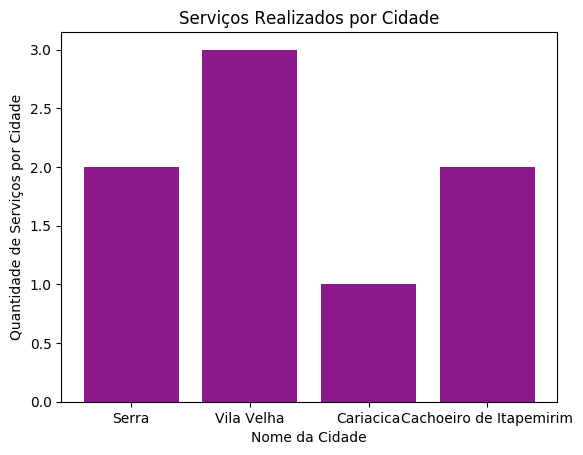

In [86]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
grafico1 = pd.read_sql_query("""
                              SELECT count(cidade.nome) AS qtd_de_servico_na_cidade,cidade.nome AS nome_da_cidade FROM usuario 
                              INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                              INNER JOIN agendamento ON (usuario.codigo = agendamento.codigo_cliente)
                              INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                              INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                              INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) group by cidade.nome;  
                            """,conn)
df = pd.DataFrame(grafico1)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

 
objects = tuple(df.nome_da_cidade)
y_pos = np.arange(len(objects))
performance = list(df.qtd_de_servico_na_cidade)
 
plt.bar(y_pos, performance,align='center', alpha=0.9, color = "purple")
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Serviços por Cidade')
plt.xlabel('Nome da Cidade')
plt.title('Serviços Realizados por Cidade')

plt.show()

# **Relatório 2** 

**Objetivo:** Informar o número total de serviços agendados dos prestadores incluindo as seguintes informações: nome do serviço, descrição, categoria, preço e contato 
- Resultado:

In [0]:
relatorio2 = pd.read_sql_query("""
                            SELECT nome_completo AS nome_prestador, nome AS nome_servico, descricao, preco FROM usuario 
                            INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador);
                            """,conn)

In [88]:
relatorio2

,nome_prestador,nome_servico,descricao,preco
0,Kauan Rocha Pinto,Manutencao de ar-condicionado,Instalacao - Manutencao - Higienizacao ar cond...,0.0
1,Jose Pereira Carvalho,Frete,"Faco transporte, mudancas, fretes, etc para to...",150.0
2,Fabio Melo Barros,Jardinagem,Corte de arvores e podas em geral,0.0
3,Clara Rocha Alves,Baba,Cuido de criancas com responsabilidade. Valor ...,60.0
4,Joao Gomes Almeida,Faxineiro,Faco faxinas,90.0
5,Yasmin Barros Carvalho,Eletricista,"Instalacao, alteracao, manutencao e reparo em ...",0.0
6,Luis Carvalho Pereira,Pedreiro,Orcamento gratuito e servico de qualidade,0.0
7,Martim Oliveira Correia,Motorista particular,"Viagens, passeios e corridas rapidas!!",0.0
8,Leonor Azevedo Sousa,Borracheiro,Atendimento 24 horas,80.0
9,Julieta Cavalcanti Rocha,Baba,Cuido de criancas ate 6 anos.,50.0


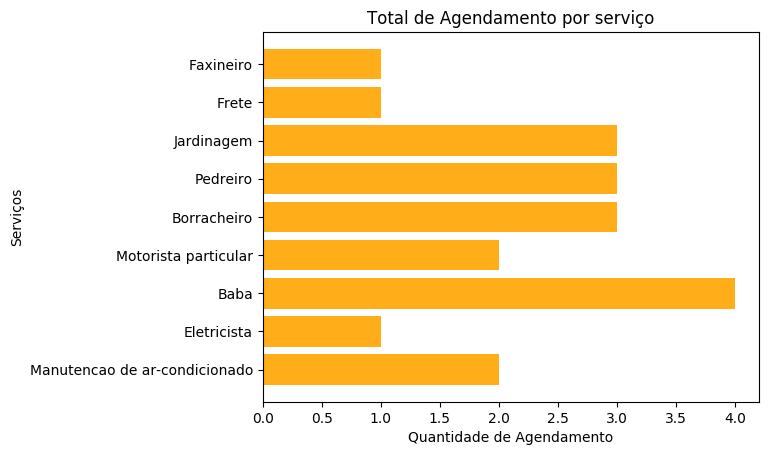

In [89]:
import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np
import matplotlib.pyplot as plt

grafico2 = pd.read_sql_query("""
                            SELECT servico.nome, COUNT( * ) AS qtd_agendamentos FROM agendamento 
                            INNER JOIN servico ON (servico.codigo = agendamento.codigo_servico) 
                            GROUP BY servico.nome;
                            """,conn)  

df = pd.DataFrame(grafico2)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.qtd_agendamentos)
 
plt.barh(y_pos, performance, align='center', alpha= 0.9, color = "orange")
plt.yticks(y_pos, objects)
plt.xlabel('Quantidade de Agendamento')
plt.ylabel('Serviços')
plt.title('Total de Agendamento por serviço')

plt.show()

# **Relatório 3** 

**Objetivo:** Informar serviços agendados para um determinado dia incluindo as seguintes informações: nome do cliente, descrição do serviço, data, hora e localização. 
- Resultado:

In [0]:
relatorio3 = pd.read_sql_query("""
                              SELECT nome_completo AS nome_cliente, servico.nome AS "servico_contratado", agendamento.data,agendamento.hora, cidade.nome AS nome_da_cidade FROM usuario 
                              INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                              INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) 
                              INNER JOIN agendamento ON (usuario.codigo = agendamento.codigo_cliente) 
                              INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                              INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade);   
                            """,conn)

In [91]:
relatorio3

,nome_cliente,servico_contratado,data,hora,nome_da_cidade
0,Fabio Melo Barros,Jardinagem,2019-11-03,14h00,Serra
1,Fabio Melo Barros,Jardinagem,2019-10-12,11h00,Serra
2,Clara Rocha Alves,Baba,2019-09-09,7h00,Cariacica
3,Joao Gomes Almeida,Faxineiro,2019-10-02,20h00,Vila Velha
4,Martim Oliveira Correia,Motorista particular,2019-10-01,17h00,Cachoeiro de Itapemirim
5,Martim Oliveira Correia,Motorista particular,2019-09-27,20h00,Cachoeiro de Itapemirim
6,Luis Carvalho Pereira,Pedreiro,2019-09-17,14h30,Vila Velha
7,Luis Carvalho Pereira,Pedreiro,2019-09-24,12h00,Vila Velha


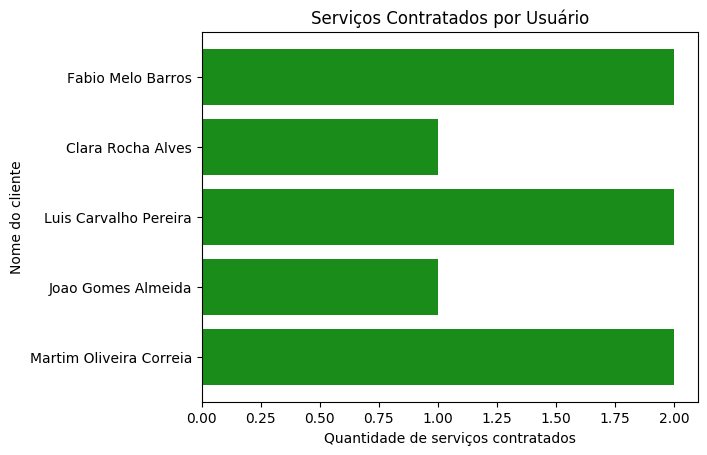

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
grafico3 = pd.read_sql_query("""
                              SELECT COUNT(*) AS qtd_agendamento, nome_completo AS nome_cliente FROM usuario 
                              INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                              INNER JOIN servico ON (usuario.codigo = servico.codigo_prestador) INNER JOIN agendamento ON (usuario.codigo = agendamento.codigo_cliente) 
                              INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                              INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) GROUP BY nome_cliente;  
                            """,conn)
df = pd.DataFrame(grafico3)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

 
objects = tuple(df.nome_cliente)
y_pos = np.arange(len(objects))
performance = list(df.qtd_agendamento)
 
plt.barh(y_pos, performance,align='center', alpha=0.9, color = "green")
plt.yticks(y_pos, objects)
plt.ylabel('Nome do cliente')
plt.xlabel('Quantidade de serviços contratados')
plt.title('Serviços Contratados por Usuário')

plt.show()

# **Relatório 4** 

**Objetivo:** Informar avaliações e comentários recebidos para um determinado serviço. 
- Resultado:

In [0]:
relatorio4 = pd.read_sql_query("""
                            SELECT nome AS nome_do_servico, avaliacao, comentario FROM avaliacoes INNER JOIN servico ON (servico.codigo = avaliacoes.codigo_servico);
                            """,conn)

In [94]:
relatorio4

,nome_do_servico,avaliacao,comentario
0,Manutencao de ar-condicionado,4,Muito bom
1,Frete,5,"Perfeito, resolveu todo o meu problema. Servic..."
2,Jardinagem,5,"Ficou tudo perfeito, amei"
3,Baba,5,Meu filho adorou
4,Faxineiro,0,Atrasou e nao limpou o banheiro
5,Manutencao de ar-condicionado,3,Resolveu o problema
6,Borracheiro,5,Atendimento rapido
7,Pedreiro,4,Muito organizado e deixa tudo limpo
8,Baba,5,Muito simpatica
9,Motorista particular,4,Carro limpo e com balinha


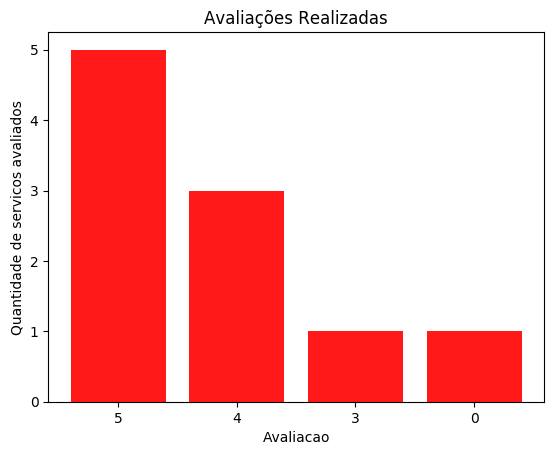

In [95]:
import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np
import matplotlib.pyplot as plt
grafico4 = pd.read_sql_query("""SELECT avaliacao, COUNT(*) AS qtd_de_avaliacoes FROM avaliacoes GROUP BY avaliacao ORDER BY avaliacao DESC;""",conn)

df = pd.DataFrame(grafico4)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

 
objects = tuple(df.avaliacao)
y_pos = np.arange(len(objects))
performance = list(df.qtd_de_avaliacoes)
 
plt.bar(y_pos, performance, align='center', alpha=0.9, color = "red")
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de servicos avaliados')
plt.xlabel('Avaliacao')
plt.title('Avaliações Realizadas')
 
plt.show()

# **Relatório 5**  

**Objetivo:** Mostrar as informações de contato de um usuário incluindo: nome do cliente, cidade, bairro, endereço e número. 
- Resultado:

In [0]:
relatorio5 = pd.read_sql_query("""
                            SELECT nome_completo AS nome_cliente,endereco AS rua, bairro.nome AS nome_do_bairro, endereco.numero AS numero_casa,cidade.nome AS nome_da_cidade, email, telefone FROM usuario 
                            INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                            INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                            INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) 
                            INNER JOIN bairro ON (bairro.codigo = endereco.codigo_bairro) 
                            INNER JOIN contato ON (usuario.codigo = contato.codigo_usuario); 
                            """,conn)

In [97]:
relatorio5

,nome_cliente,rua,nome_do_bairro,numero_casa,nome_da_cidade,email,telefone
0,Miguel Oliveira Souza,Rua Joao da Costa Rampinelli,De Carli,150,Aracruz,MiguelOliveiraSouza@gmail.com,(27) 4075-9797
1,Mariana Lima Ribeiro,Rua Atenas,Aracas,1960,Vila Velha,MarianaLimaRibeiro@gmail.com,(28) 4459-2069
2,Kauan Rocha Pinto,Rua Alfredo Chaves,Central Carapina,1074,Serra,KauanRochaPinto@hotmail.com,(28) 8799-5493
3,Aline Lima Silva,Rua Arrudao,Centro da Serra,270,Serra,AlineLimaSilva@hotmail.com,(27) 8570-9305
4,Leonor Azevedo Sousa,Avenida Aracruz,Colina,1125,Linhares,LeonorAzevedoSousa@gmail.com,(27) 5747-8945
5,Fabio Melo Barros,Rua Primavera,das Laranjeiras,689,Serra,FabioMeloBarros@hotmail.com,(27) 2525-7502
6,Luis Carvalho Rodrigues,Escadaria Agripino Moreira Drumond,Caratoira,676,Vitoria,LuisCarvalhoRodrigues@hotmail.com,(28) 8798-2391
7,Clara Rocha Alves,Rua Sebastiao Pedro de Oliveira,Campina Grande,615,Cariacica,ClaraRochaAlves@yahoo.com.br,(27) 7163-5324
8,Joao Gomes Almeida,Rua Dalia,Santa Paula I,506,Vila Velha,JoaoGomesAlmeida@gmail.com,(28) 3389-9972
9,Martim Oliveira Correia,Rua Amancio Silva,Arariguaba,496,Cachoeiro de Itapemirim,MartimOliveiraCorreia@hotmail.com,(27) 3706-4024


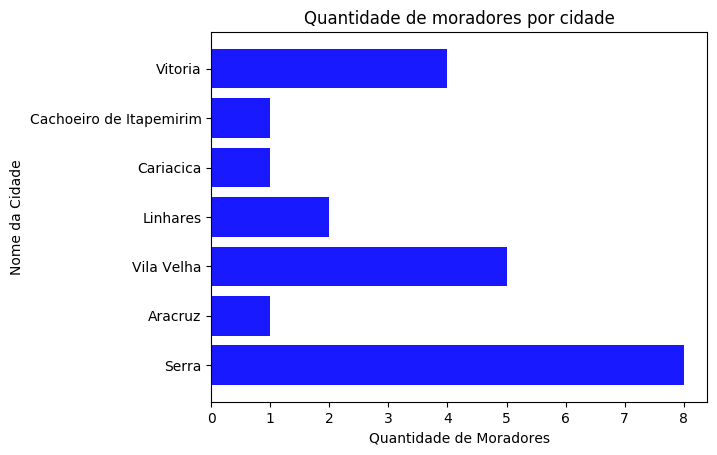

In [98]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
grafico5 = pd.read_sql_query("""
                            SELECT cidade.nome AS nome_da_cidade, COUNT(*) AS qtd_de_moradores FROM usuario
                            INNER JOIN usuario_endereco AS ue ON (usuario.codigo = ue.codigo_usuario)
                            INNER JOIN endereco ON (ue.codigo_endereco = endereco.codigo) 
                            INNER JOIN cidade ON (cidade.codigo = endereco.codigo_cidade) 
                            INNER JOIN bairro ON (bairro.codigo = endereco.codigo_bairro) 
                            GROUP BY nome_da_cidade; 
                            """,conn)

df = pd.DataFrame(grafico5)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

 
objects = tuple(df.nome_da_cidade)
y_pos = np.arange(len(objects))
performance = list(df.qtd_de_moradores)
 
plt.barh(y_pos, performance,align='center', alpha=0.9, color = "blue")
plt.yticks(y_pos, objects)
plt.ylabel('Nome da Cidade')
plt.xlabel('Quantidade de Moradores')
plt.title('Quantidade de moradores por cidade')
 
plt.show()